# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Gopal Sharma </font>

# Introduction

The objective of this assignment is to get familiar with the working of linear regression and to visualize and observe the data. We are also going to find correlation to reuse this data for linear regression.

# Data

## Introduction of data

The dataset is taken from the repository of Kaggle. 
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

1. id, the listing ids
2. name, Name of the listing
3. host_id, id of the host
4. host_name, name of the host
5. neighbourhood_group, location of the listing
6. neighbourhood, area of the location
7. latitude, coordinates of the location
8. longitude, coordinates of the location
9. room_type, listing space type
10. price, price in dollars
11. minimum_nights, amount of nights minimum
12. number_of_reviews, # of reviews for the location
13. last_review, latest review of the location
14. reviews_per_month, # of reviews per month
15. calculated_host_listings_count, amount of listing per host
16. availability_365, number of days when listing is available for booking

# Method

The two classes LinearRegress and LMS inherit the LinearModel class. The LinearRegress class is being used for Least Squares. I have used the solve function in the numpy library to calculate the weights inside the train method of the class. The use function returns the dot product of the weight and the input data.

In the LMS class, there are three functions train, train_step and use. The use function for LMS class is similar to that of the LinearRegress class. The train function calls the train_step function to update the weights. The train_step takes one instance and the corresponding target value as an input. The following equation is used to update the weights in the train_step function.


$$\begin{align*}
  f(x;w) &amp;= w^Tx = \sum_0^D w_i x_i \\
     &amp;= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}$$



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [2]:
df= pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

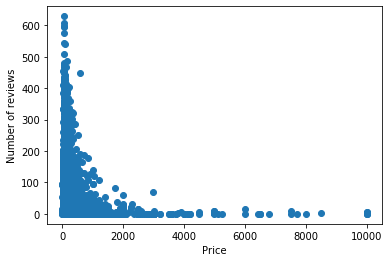

In [4]:
X = df.iloc[:, 9]
Y = df.iloc[:, 11]
plt.scatter(X, Y)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Analysis of data

In [7]:
df.corr()['number_of_reviews']

id                               -0.319760
host_id                          -0.140106
latitude                         -0.015389
longitude                         0.059094
price                            -0.047954
minimum_nights                   -0.080116
number_of_reviews                 1.000000
reviews_per_month                 0.549868
calculated_host_listings_count   -0.072376
availability_365                  0.172028
Name: number_of_reviews, dtype: float64

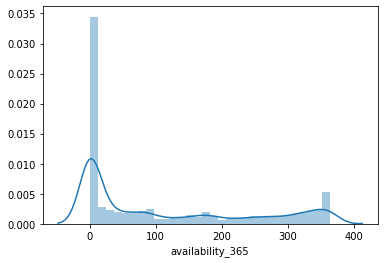

In [8]:
sns.distplot(df['availability_365'])

In [9]:
df_cr=df[['price','number_of_reviews','availability_365']]

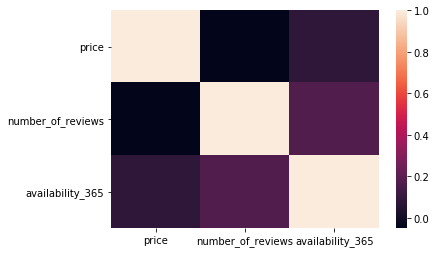

In [10]:
sns.heatmap(df_cr.corr())

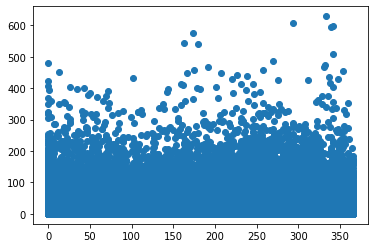

In [11]:
plt.scatter(df['availability_365'],df['number_of_reviews'])

## Preprocessing of Data

In [12]:
#After observing the data we can note that there are some zero values in the number_of_reviews. 
#We will try to normalize the data and observe it afterwards.

df['availability_365'] = df['availability_365'].replace('0',np.nan)
df.dropna(how='any',inplace=True)
df['availability_365'].shape

(38821,)

In [13]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [25]:
#Dropping the columns which do not have any impact on the algorithm

df_x=df.drop(['id','name','host_id','host_name','neighbourhood', 'neighbourhood_group','room_type', 'last_review'],axis=1, inplace=True)
#df.drop(['name', 'host_id','host_name', 'neighbourhood', 'last_review'], axis=1, inplace=True)

KeyError: "['id' 'name' 'host_id' 'host_name' 'neighbourhood' 'neighbourhood_group'\n 'last_review'] not found in axis"

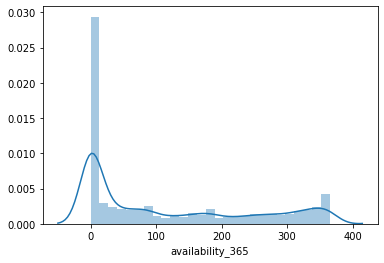

In [16]:
sns.distplot(df['availability_365'])

In [29]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,room_type
0,Private room
1,Entire home/apt
3,Entire home/apt
4,Entire home/apt
5,Entire home/apt


In [18]:
df.dtypes

latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

In [23]:
df.shape

(38821, 9)

In [ ]:
num_of_rows = int((38843) * 0.8)

train_data = df.iloc[:num_of_rows] #indexes rows for training data
test_data = df.iloc[num_of_rows:] #indexes rows for test data

In [97]:
X = df.iloc[:,[0,1,2,4,5,6,7,8]].values
T = df.iloc[:,3:4].values

In [98]:
""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [99]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [100]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]

C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [96]:
from sklearn import preprocessing
df_normalized = preprocessing.normalize(df)
df_normalized = (df-df.mean())/(df.max()-df.min())

## Preliminary Observation

After carefully examining the dataset i have observed that:

There are zero values in the column availability_365 which means that the listing is not at all available. We have removed all such listings. We have plotted a before and after plot. We can look at the plots that there are no such zero values after the normalization. 

Also from the scatter plot we can observe that airbnb listings in Manhattan, Brooklyn, Queens are more expensive than the other listings.  
We can also see that the number_of_reviews has maximum correlation with reviews_per_month which has to be that way. More the amount of reviews for a host, more the number of reviews per month for that host.  
We have some categorical variables in the form of room_type which we have label encoded for our purpose of training the model.

### Super Classs Definition

In [101]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

The parameter that gives best fit will be

$$ wv^* = \arg\min_wv \sum_{i=1}^{N} \Big( f(xv_i; wv) - t_i \Big)^2 $$

I have used np.linalg.lstsq method of numpy library to implement the train and use function.


In [106]:
ls1= LinearRegress()
ls1.train(Xtrain, Ttrain)
T_predict=ls1.use(Xtest)

Weights after LS: [[-4.46939233e+04]
 [ 1.67959094e+02]
 [-5.14249288e+02]
 [-9.34788010e+01]
 [-9.15787326e-02]
 [-1.46375453e-01]
 [-1.63939196e+00]
 [-4.64284293e-01]
 [ 1.66800167e-01]]


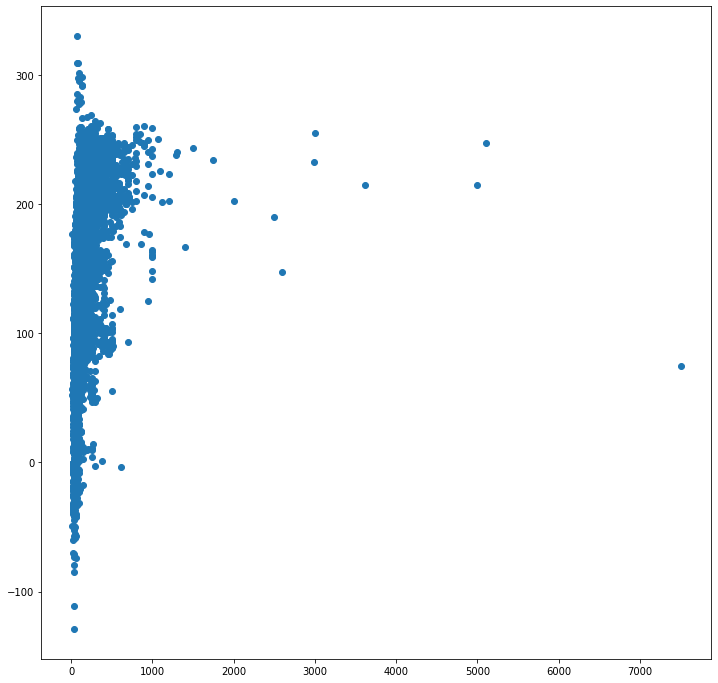

In [115]:
ls1 = LinearRegress()

ls1.train(Xtrain, Ttrain)
#print(ls.w)
#print(X)
y = ls1.use(Xtest)
#print(y)
#plt.plot(X, ls.use(X))
#plt.plot(X, T)
#plt.plot(ls.use(X))

plt.scatter(Ttest,ls1.use(Xtest))
print('Weights after LS: {0}'.format(ls1.w))

In [57]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        #N = X.shape[0]
        X1 = self.add_ones(X)
        S = np.linalg.inv(X1.T @ X1)
        R = X1.T @ T
        w = S @ R
        #w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
        self.w = w
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        y = X1 @ self.w
        return y

### Least Mean Squares

$$
 wv^{(k+1)} = wv^{(k)} - \alpha \Big( {wv^{(k)}}^\top xv_k - t_k \Big) xv_k.
 $$
 
train, train_step and use method have been implemented in this model. 

In [92]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):  
            for x, t in zip(X, T):
                self.train_step(x,t)

            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        
        m=t.size
        a = self.w.T @ x
        a=a-t
        self.w =self.w - (self.alpha * a * x)
        
        
    def use(self, X):
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)

        x = self.add_ones(X).T
        y = self.w.T @ x
        
        return y.T
        

### Usage Examples

In [51]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

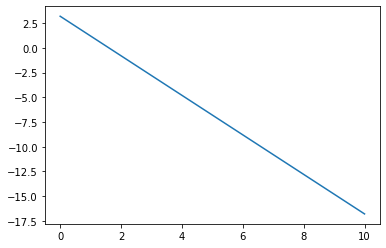

In [61]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

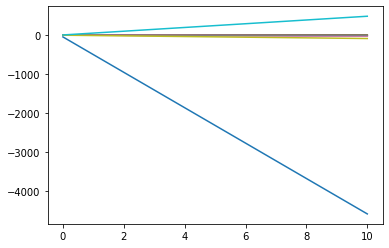

In [53]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

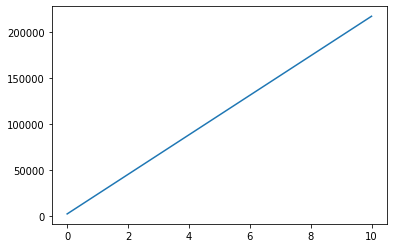

In [54]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


## Cost Function

When we define w∈IRD, the choice of D real numbers can result in the best result. The sum of square error function defines as follows:

$$
 E(wv) = sum_{i=1}^N Big( f(xv_i; wv_i) - t_i Big)^2
 $$

This error function says that we want to minimize the sum of Euclidean distances between the target values and the model outputs. Here the square term leads the distances are not biased a few samples since sacrificing others with large errors will disturb the objective.

## Least Squares


Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to w to zero. For this, let us prepare data in matrix. The target values are collected in matrix t, and the input samples are in matrix X.

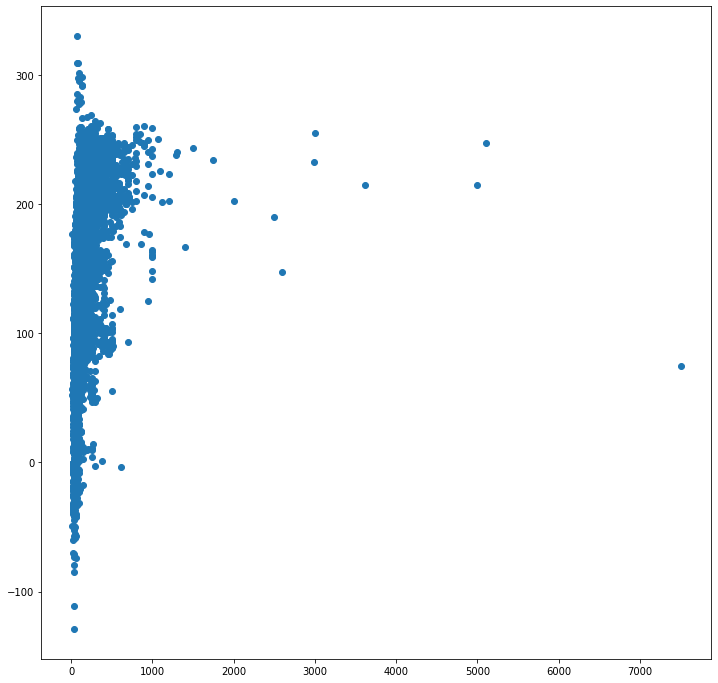

In [109]:
#plt.plot(Ttest, ls.use(Xtest))
plt.scatter(Ttest, T_predict)

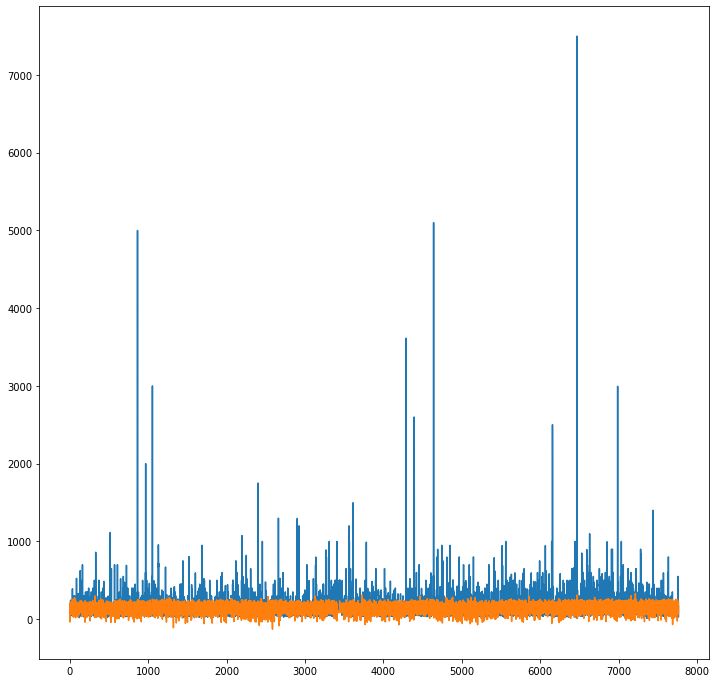

In [112]:
plt.plot(Ttest)
plt.plot(T_predict)

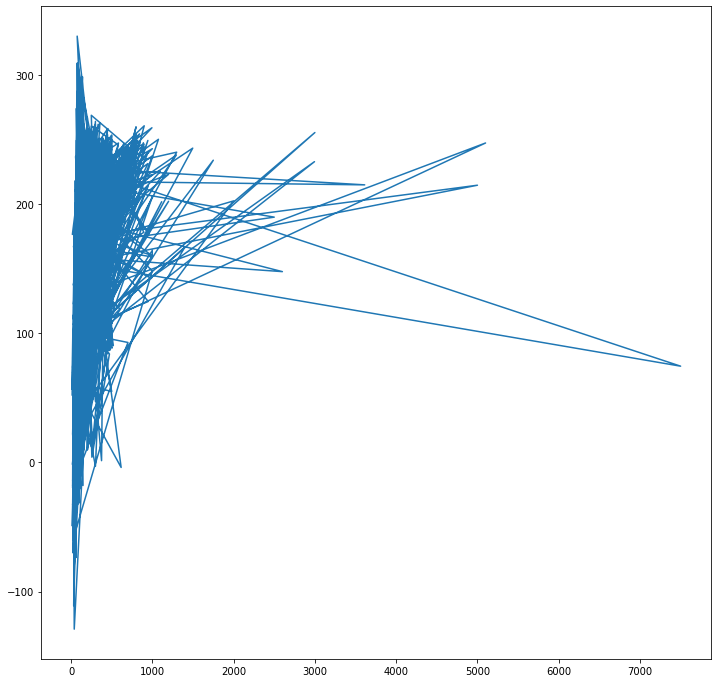

In [114]:
plt.plot(Ttest, T_predict)

## Least Mean Squares

The least mean squares is an online learning methods in which the weights are updated for each new instance which enters the training data. The error is calculated after every instance and the weights are updated in such a way that the error function is smaller for the next iteration than the previous iteration.

LMS

In [ ]:
lms = LMS(0.001)
#lms.train(Xtrain, Ttrain)
for x, t in zip(Xtrain, Ttrain):
    lms.train_step(x, t)

Y_predict = lms.use(Xtest)

# Analysis and Observation of Algorithms

The two algorithms used are the least squares algorithm and the least mean square algorithm. The former is a batch learning method while the latter is online learning method. The least squares method can be more accurate but is computationally expensive. Calculating the inverse of the matrix is required. Sometimes the matrix can also be singular i.e. non-invertible. Weights can be calculated in a step by satisfying the minima condition. 

# Conclusions

The main challenge in the dataset was to preprocess the data before implementing the linear models on it. Though the dataset was simple but i had to drop several features as they were not not going to impact the results. 
What i have understood from it is that preprocessing is really important before implementing the algorithm. I have learnt to implement the Linear model onto my dataset and have started understanding the dataset more. 

# References

Professor's Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb

Wikipedia: https://en.wikipedia.org/wiki/Linear_regression


# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [104]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


In [95]:
lms = LMS(0.001)
#lms.train(Xtrain, Ttrain)
for x, t in zip(Xtrain, Ttrain):
    lms.train_step(x, t)

Y_predict = lms.use(Xtest)

C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in matmul
C:\Users\Gopal\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in subtract


In [94]:
Y_predict

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])